In [9]:
from os.path import join
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile

In [10]:
path='train/'

files = [f for f in listdir(path) if isfile(join(path, f))]

len(files)

202

In [11]:
import xml.etree.ElementTree as ET
import re


def xml2df(xml_data,i):
    #xml_data=re.sub(u"(\u2018|\u2019)", "'", xml_data)
    tree = ET.parse(xml_data) #Initiates the tree Ex: <user-agents>
    
    all_records = [] #This is our record list which we will convert into a dataframe
    headers = [] #Subchildren tags will be parsed and appended here
    record = []
    attrib=[]
    values=[]
    label=[]
    tex=""
    for elem in tree.iter(): #Begin looping through our root tree
        if(elem.tag!='PatientMatching' and elem.tag!='TAGS'):
            headers.append(elem.tag)
            record.append(elem.text)
            attrib.append(elem.attrib.get('met'))
            
    text = record[0]
    
    file = open("TEXT/"+str(i)+".txt","w+") 
    file.write(record[0])
    file.close() 
    
    all_records.append(text)
    for a in attrib[1:]:
        if(a == 'met'):
            label.append(1)
        else:
             label.append(0)
    all_records.append(label)
    all_records.append(i)
    return pd.DataFrame([all_records], columns=['text','label','name']) 

In [12]:
data = None
for file in files:
    #print(str(i)+"/"+str(len(files)), end='\r')
    df = xml2df(join(path,file),file.split(".")[0])
    if data is None: data = df
    else: data = data.append(df,ignore_index=True)
    
data = data.convert_objects(convert_numeric=True)

C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\ipykernel\__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [13]:
data.head()

,text,label,name
0,\n\nRecord date: 2106-02-12\n\nCampbell Orthop...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]",100
1,\n\nRecord date: 2079-05-12\n\n\n\n\n\nMERCY C...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]",101
2,\n\nRecord date: 2120-09-19\n\nPersonal Data a...,"[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]",102
3,\n\nRecord date: 2067-11-24\n\n ...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]",103
4,\n\nRecord date: 2094-02-16\n\nJENNIFER BOOKER...,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]",104


In [109]:
data['alc']=data.label.map(lambda x: x[2])

In [201]:
from nltk.tokenize import sent_tokenize, word_tokenize

data['sen'] = data.text.map(lambda x: sent_tokenize(x.replace("\n",". ")))

In [202]:
def isgood(x):
    gs=""
    expr = re.compile('.*alcoholic.*|.*abuse.*|.*binge.*|.*sober.*')
    for s in x:
        w=word_tokenize(s)
        for a in w:  
            if re.match(expr,a.lower()):
                gs=gs+s
                break
    return gs
    

In [203]:
data['sen']=data.sen.map(lambda x: isgood(x) )

In [204]:
import re
def removeDates(s):
    expr = re.compile('\d{2}/\d{2}/\d{4}')
    line = re.sub(expr, '', s)
    return line

In [205]:
data['clean']=data.sen.map(lambda x: removeDates(x))
data.clean.head()

0    SOCIAL HISTORY: The patient denies active toba...
1                                                     
2                               Substance abuse: none.
3                                                     
4                          Nonsmoker, sober x 5 years.
Name: clean, dtype: object

In [249]:
data[data.alc==0]

,text,label,name,alc,sen,clean,split,ind,lens
0,\n\nRecord date: 2106-02-12\n\nCampbell Orthop...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]",100,0,SOCIAL HISTORY: The patient denies active toba...,SOCIAL HISTORY: The patient denies active toba...,"[social, history, :, the, patient, denies, act...","[398, 253, 76, 420, 343, 177, 98, 428, 340, 11...",13
1,\n\nRecord date: 2079-05-12\n\n\n\n\n\nMERCY C...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]",101,0,,,[],[],0
2,\n\nRecord date: 2120-09-19\n\nPersonal Data a...,"[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]",102,0,Substance abuse: none.,Substance abuse: none.,"[substance, abuse, :, none, .]","[411, 85, 76, 323, 8]",5
3,\n\nRecord date: 2067-11-24\n\n ...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]",103,0,,,[],[],0
4,\n\nRecord date: 2094-02-16\n\nJENNIFER BOOKER...,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]",104,0,"Nonsmoker, sober x 5 years.","Nonsmoker, sober x 5 years.","[nonsmoker, ,, sober, x, 5, years, .]","[329, 6, 395, 453, 60, 455, 8]",7
5,"\n\nRecord date: 2145-08-13\n\nAugust 12, 2145...","[0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]",105,0,He denies any history of alcohol or drug abuse.,He denies any history of alcohol or drug abuse.,"[he, denies, any, history, of, alcohol, or, dr...","[242, 177, 122, 253, 337, 111, 340, 194, 85, 8]",10
6,\n\nRecord date: 2083-11-17\n\nNORTHWEST IOWA ...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]",106,0,She is also having stressors with her grandson...,She is also having stressors with her grandson...,"[she, is, also, having, stressors, with, her, ...","[390, 276, 117, 236, 409, 450, 249, 230, 6, 44...",31
7,\n\nRecord date: 2095-02-16\n\nEDVISIT^7565949...,"[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]",107,0,,,[],[],0
8,\n\nRecord date: 2098-08-18\n\n\n\nJensen Clin...,"[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]",109,0,,,[],[],0
9,\n\nRecord date: 2069-04-07\n\n \n \n \nMr. Vi...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]",110,0,,,[],[],0


In [207]:
data.clean.iloc[155]

''

In [208]:
data['split']=data.clean.map(lambda x: word_tokenize(x.lower()))

In [209]:
import nltk
from sklearn import preprocessing
we = preprocessing.LabelEncoder()
pstemmer = nltk.lancaster.LancasterStemmer()

vocab  = set([pstemmer.stem(i) for x in data.split for i in x])

In [210]:
len(vocab)

460

In [211]:
vocab

{'#',
 '%',
 '&',
 "'s",
 '(',
 ')',
 ',',
 '-',
 '.',
 '.-obtain',
 '..',
 '.2',
 '.abuse',
 '.alcohol',
 '.alcohol/illicit/iv',
 '.although',
 '.another',
 '.brother-',
 '.clean',
 '.dependent',
 '.etoh',
 '.h/o',
 '.had',
 '.he',
 '.hepatobiliary',
 '.history',
 '.nonalcoholic',
 '.pmh/fh/sh',
 '.problems',
 '.substance',
 '08',
 '1',
 '1/67',
 '10',
 '14',
 '15',
 '16',
 '18axillary',
 '2',
 '2078',
 '2087..',
 '2114greater',
 '25',
 '2mg',
 '2nd',
 '3',
 '3/8',
 '30',
 '300mg',
 '325',
 '325mg',
 '38.4',
 '4',
 '4/19h/o',
 '4/27/63hepatitis',
 '40',
 '40mg',
 '47.sober',
 '47hernia',
 '49',
 '5',
 '50',
 '50mg',
 '51',
 '5mg',
 '6.00',
 '6.she',
 '60',
 '600',
 '7',
 '71',
 '74',
 '75',
 '75mg',
 '8211',
 '95',
 ':',
 ';',
 '>',
 '?',
 'a',
 'aa/n',
 'abnorm',
 'abov',
 'abstin',
 'abus',
 'abuse..',
 'abuse.alcohol',
 'abuse.drugs',
 'abuse.father',
 'abuse.h',
 'abuse.his',
 'abuse.tobacco',
 'abuses.substance',
 'accid',
 'accident.brother-',
 'acetylsalicyl',
 'acid',
 'act',


In [212]:
we.fit(list(vocab)) 

LabelEncoder()

In [213]:
data['ind'] = data.split.map(lambda x: [we.transform([pstemmer.stem(i)])[0] for i in x])

In [214]:
data.to_pickle("alcohol.pkl")

In [ ]:
data=

In [215]:
from keras.preprocessing import sequence

data['lens'] = data.ind.map(lambda x: len(x))
maxlen = max(data.lens)
maxlen

321

In [216]:
#datac=datac.sample(frac=0.05)
train=data.sample(frac=0.8,random_state=200)
test=data.drop(train.index)

train.shape, test.shape

((162, 9), (40, 9))

In [217]:
X_train = sequence.pad_sequences(train.ind, maxlen=maxlen)
X_train = np.array([x.ravel() for x in X_train])

In [218]:
y_train = np.array([x for x in train.alc])
y_train.shape

(162,)

In [234]:
import numpy
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing import sequence
import numpy as np
import random


model = Sequential()
model.add(Embedding(len(vocab), maxlen, input_length=X_train.shape[1]))
model.add(Dense(200, activation='tanh'))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 321, 321)          147660    
_________________________________________________________________
dense_15 (Dense)             (None, 321, 200)          64400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 321, 200)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 332,561
Trainable params: 332,561
Non-trainable params: 0
_________________________________________________________________
None


In [235]:
model.fit(X_train, y_train, batch_size=128, epochs=1)

Epoch 1/1
162/162 [==============================] - 5s 29ms/step - loss: 0.5920 - acc: 0.6852


In [236]:
model.save('Trained Models/model-alcohol.h5')

In [ ]:
model = load_model('Trained Models/model-alcohol.h5')

In [237]:
X_test = sequence.pad_sequences(test.ind, maxlen=maxlen)
X_test = np.array([x.ravel() for x in X_test])

In [238]:
Y_test = np.array([x for x in test.alc])
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [239]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.441473926697
Test accuracy: 0.925


In [240]:
prediction = model.predict(np.array(X_test))
df=pd.DataFrame(columns=["pr", "lb"])

In [241]:
df.pr=list(prediction)
df.lb=list(Y_test)
df['res']=df.pr.map(lambda x: 1 if x>0.5 else 0)
df['id']=list(test.name)
df['idlb']=list(test.label.map(lambda x: x[8]))

In [242]:
df.head()

,pr,lb,res,id,idlb
0,[0.00200091],0,0,101,0
1,[0.00200091],0,0,107,0
2,[0.00200091],0,0,116,0
3,[0.00200091],0,0,121,0
4,[0.00200091],0,0,125,1


In [243]:
i=0
a=0
for index, row in df.iterrows():
    if row.lb==1:
        a=a+1
        if (row.lb==row.res) :
            i=i+1
i/a

0.0

In [244]:
i=0
a=0
for index, row in df.iterrows():
    if row.lb==0:
        a=a+1
        if (row.lb==row.res) :
            i=i+1
i/a

1.0

In [245]:
from collections import defaultdict
import operator
from sklearn.metrics import accuracy_score, f1_score

I = [1,0]


f1_score(df.lb, df.res, labels=I, average='macro')

C:\Users\rezvanjoshaghani\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.48051948051948051

In [246]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test, Y_test)

0.90000000000000002

In [247]:
guess = model.predict_classes(X_test)
guess = [g[0] for g in guess]
gold = Y_test
guess[:5], gold[:5]

([0, 0, 0, 0, 0], array([0, 0, 0, 0, 0], dtype=int64))

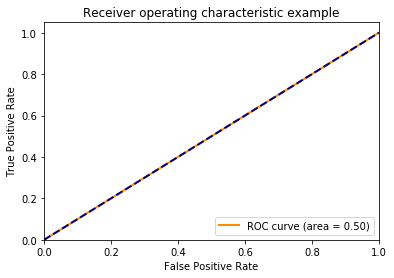

In [248]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 

x, y, _ = metrics.roc_curve(gold, guess)
auc = metrics.auc(x, y)

plt.figure()
lw = 2
plt.plot(x, y, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

